### 求取数据下一个主成分
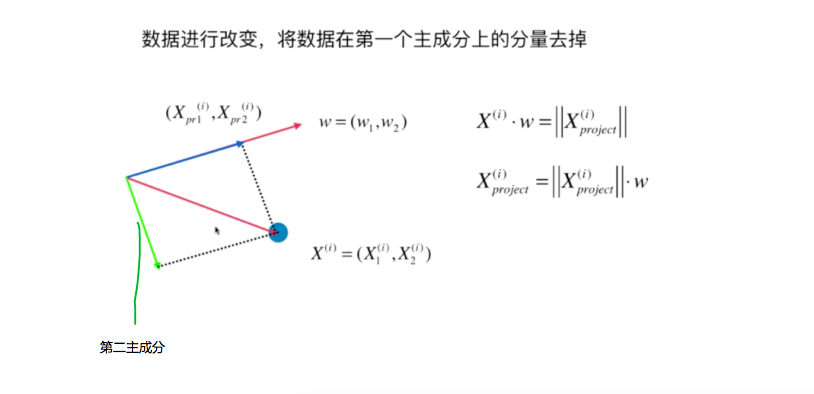

1. 将数据在第一个主成分的分量去掉
2. 再对剩余分量求取主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
# 生成 0~100 的随机浮点数. 随机分布
X[:,1] = 0.75 * X[:,0] +3. + np.random.normal(0,10.,size = 100)

In [3]:
def demean(X):
	# 减去平均值,平均值应该每个维度下的平均值.
	return  X - np.mean(X,axis = 0)

In [4]:
def f(w,X):
# 这一步向量化,还是不太明白.
    return np.sum((X.dot(w)**2))/len(X)

In [5]:
def df(w,X):
    return X.T.dot(X.dot(w))*2. /len(X)

In [6]:
def derection(w):
    return w / np.linalg.norm(w)

def first_componet(X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
	w = derection(initial_w)
	c_iters = 0

	while c_iters < n_iters:
		gradient = df(w,X)
		last_w = w
        # 注意点1:此处的w为方向向量,应该做处理.
		w = w + eta * gradient
		w = derection(w)
		if (abs(f(w,X) -f(last_w,X)) < epsilon):
			break

		c_iters += 1


	return w

In [7]:
initial_w = np.random.random(size = X.shape[1])
initial_w
eta = 0.001
X_demean = demean(X)

In [8]:
w = first_componet(X_demean,initial_w,eta)

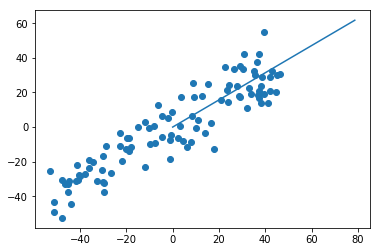

In [9]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*100],[0,w[1]*100])
plt.show()

In [10]:
#求得第二主成分
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w)*w

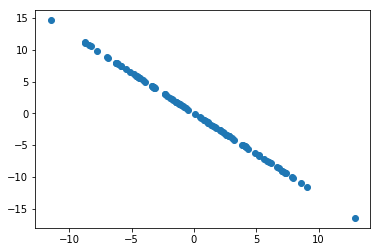

In [11]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [12]:
w2 = first_componet(X2,initial_w,eta)

In [13]:
# w 与 w2 垂直
w2.dot(w)

2.4193970148800314e-05

In [34]:
def first_n_components (n,X,eta = 0.01, n_iters = 1e4,epsilon = 1e-8):
    X_pca = X.copy()
    
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        innitial_w = np.random.random(X_pca.shape[1])
        w = first_componet(X_pca,innitial_w,eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w
        
    return res

In [35]:
first_n_components(2,X)

[array([ 0.78656008,  0.61751375]), array([-0.61750899,  0.78656383])]